<a href="https://colab.research.google.com/github/FAID-Nacera/AutoML/blob/main/automl_mljar_py_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#============================
# Step 1: Install packages
#============================

In [30]:
!pip install mljar-supervised

In [31]:
pip install pandas scikit-learn matplotlib

In [32]:
#=================================
# Step 2: Import libraries
#=================================

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML   # MLJAR AutoML
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("=== AutoML Demo with MLJAR  ===")

=== AutoML Demo with MLJAR  ===


In [34]:
#=================================
# Step 3: Load  dataset
#=================================

In [35]:
print(" Loading real dataset...")
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("homework.csv")
df = df.replace({"yes": 1, "no": 0})
if "rownames" in df.columns:
    df = df.drop(columns=["rownames"])

y = df["price"]
X = df.drop(columns=["price"])

print(f"Dataset shape: {df.shape}")
print("First 5 rows:")
print(df.head())


 Loading real dataset...


Saving homework.csv to homework (6).csv
Dataset shape: (546, 12)
First 5 rows:
   price  lotsize  bedrooms  bathrms  stories  driveway  recroom  fullbase  \
0  42000     5850         3        1        2         1        0         1   
1  38500     4000         2        1        1         1        0         0   
2  49500     3060         3        1        1         1        0         0   
3  60500     6650         3        1        2         1        1         0   
4  61000     6360         2        1        1         1        0         0   

   gashw  airco  garagepl  prefarea  
0      0      0         1         0  
1      0      0         0         0  
2      0      0         0         0  
3      0      0         0         0  
4      0      0         0         0  


/tmp/ipython-input-1744622182.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [36]:
#=================================
# Step 4: Split the data
#=================================

In [37]:
print("\n Splitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} rows")
print(f"Test set: {X_test.shape[0]} rows")


 Splitting data into train and test sets...
Training set: 436 rows
Test set: 110 rows


In [38]:
#=================================
# Step 5: Run MLJAR AutoML
#=================================

In [39]:
print("\n Running MLJAR AutoML ...")

automl = AutoML(
    mode="Explain",
    algorithms=["Baseline", "Linear", "Random Forest", "Xgboost"],
    total_time_limit=300,
    eval_metric="rmse",
    random_state=42,
    results_path="MLJAR_homework_results"
)
automl.fit(X_train, y_train)



 Running MLJAR AutoML ...
This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.


In [40]:
#=================================
# Step 6: Display results
#=================================

In [41]:
print("\n Evaluating model on test set...")
y_pred = automl.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test MSE:  {mse:.2f}")
print(f"Test R2:   {r2:.4f}")



 Evaluating model on test set...
Test RMSE: 15310.19
Test MSE:  234401854.62
Test R2:   0.6491


In [42]:
#=================================
# Step 7: Make predictions
#=================================


Predictions sample (first 10):
   y_test         y_pred
0   80000   63600.435469
1   47000   65394.851421
2  130000  111975.033028
3   47000   61699.679097
4   59000   58653.087731
5   92500   55899.979058
6   70000   56595.821614
7   45000   53651.951226
8   96500   96891.585765
9   50000   51575.184743


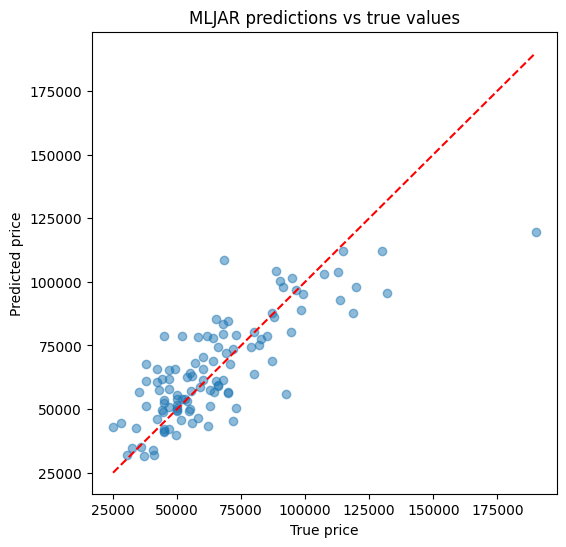


=== MLJAR AutoML Complete ===


In [43]:
print("\nPredictions sample (first 10):")
print(pd.DataFrame({
    "y_test": y_test.iloc[:10].values,
    "y_pred": y_pred[:10]
}))


plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True price")
plt.ylabel("Predicted price")
plt.title("MLJAR predictions vs true values")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--")
plt.show()

print("\n=== MLJAR AutoML Complete ===")